# **Lecture 06: Dimension**

- Chris Walshaw
- Computing & Mathematical Sciences
- University of Greenwich

## Motivation / Objectives

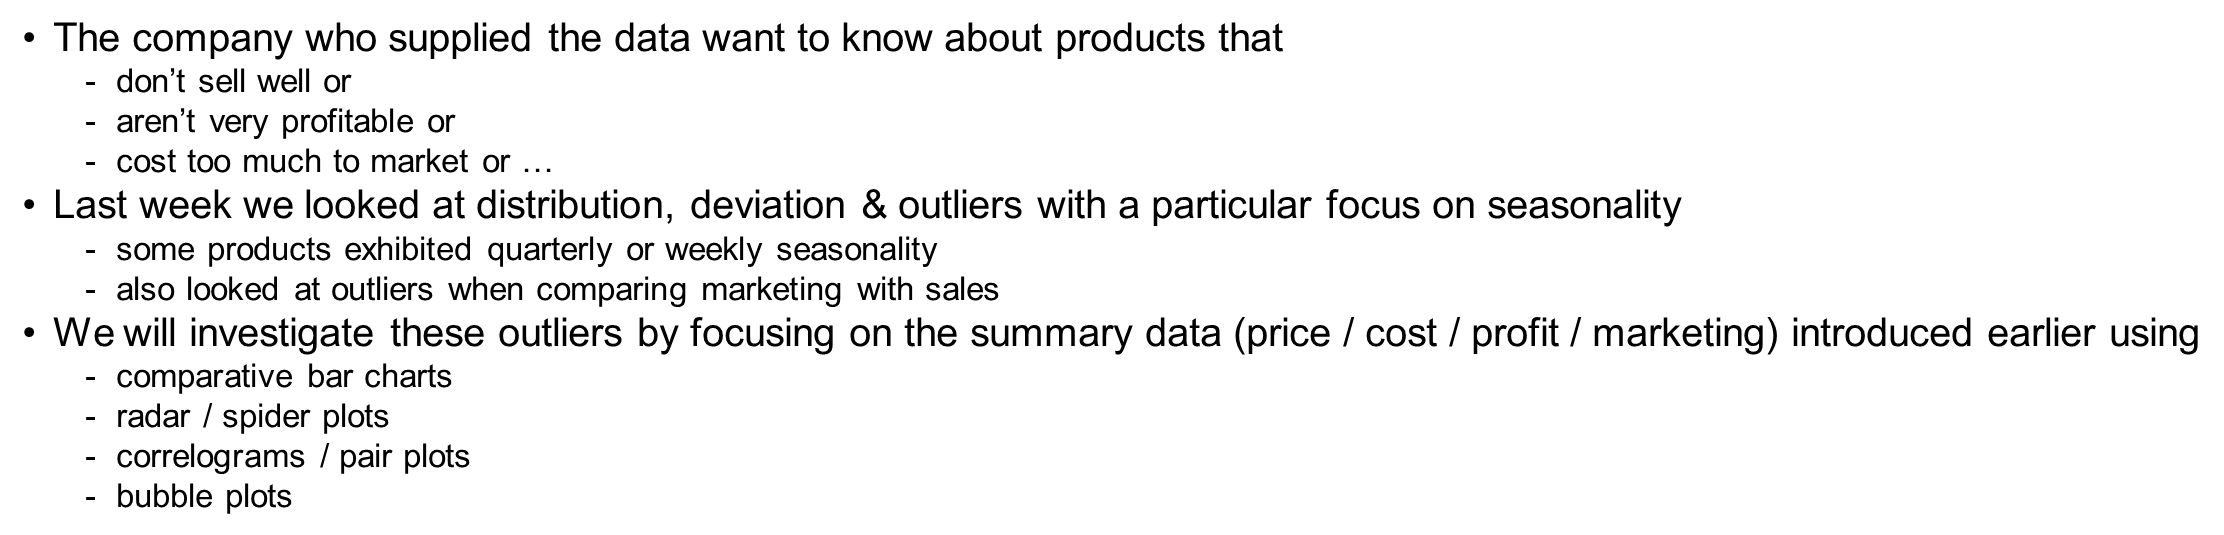

## Common features

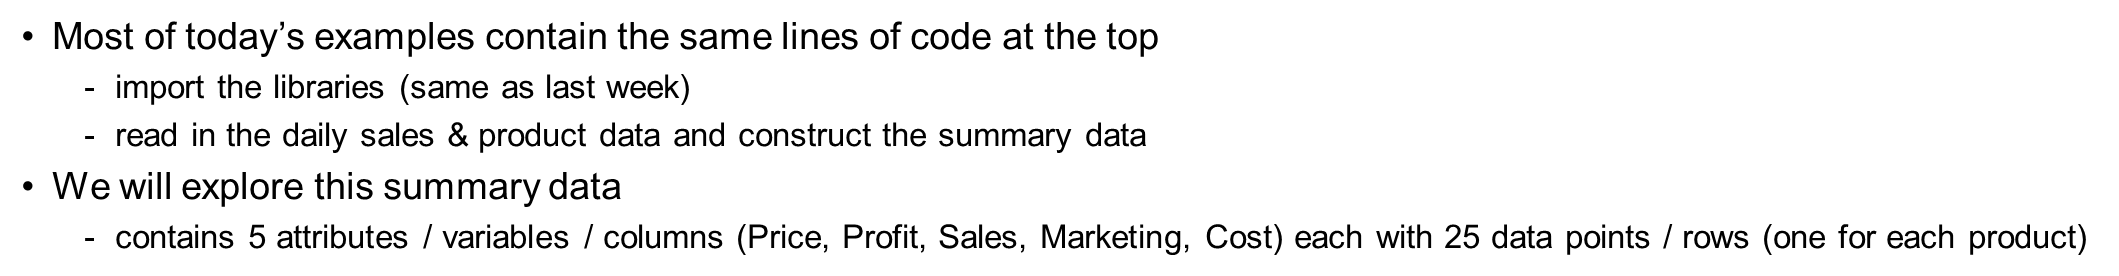

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("default")

Prepare dataframe

In [ ]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/DailySales.csv', index_col=0)
marketing_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/MarketingPerProduct.csv', index_col=0)
price_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/PricePerUnit.csv', index_col=0)
profit_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/ProfitPerUnit.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data["Price"] = price_per_unit.values
summary_data["Profit"] = profit_per_unit.values
summary_data["Sales"] = data.sum().values
summary_data["Marketing"] = marketing_data.values
summary_data["Cost"] = summary_data["Price"] - summary_data["Profit"]

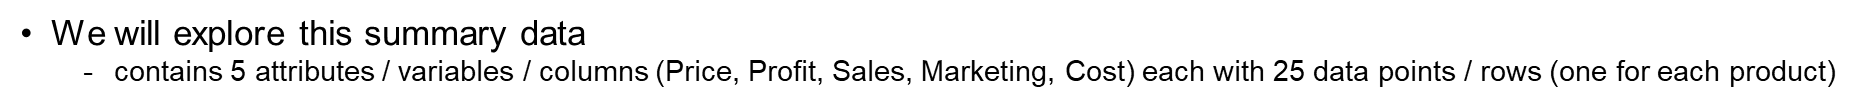

In [ ]:
print(f"Data points count: {summary_data.shape[0]}")
summary_data.head()

### Dimension?

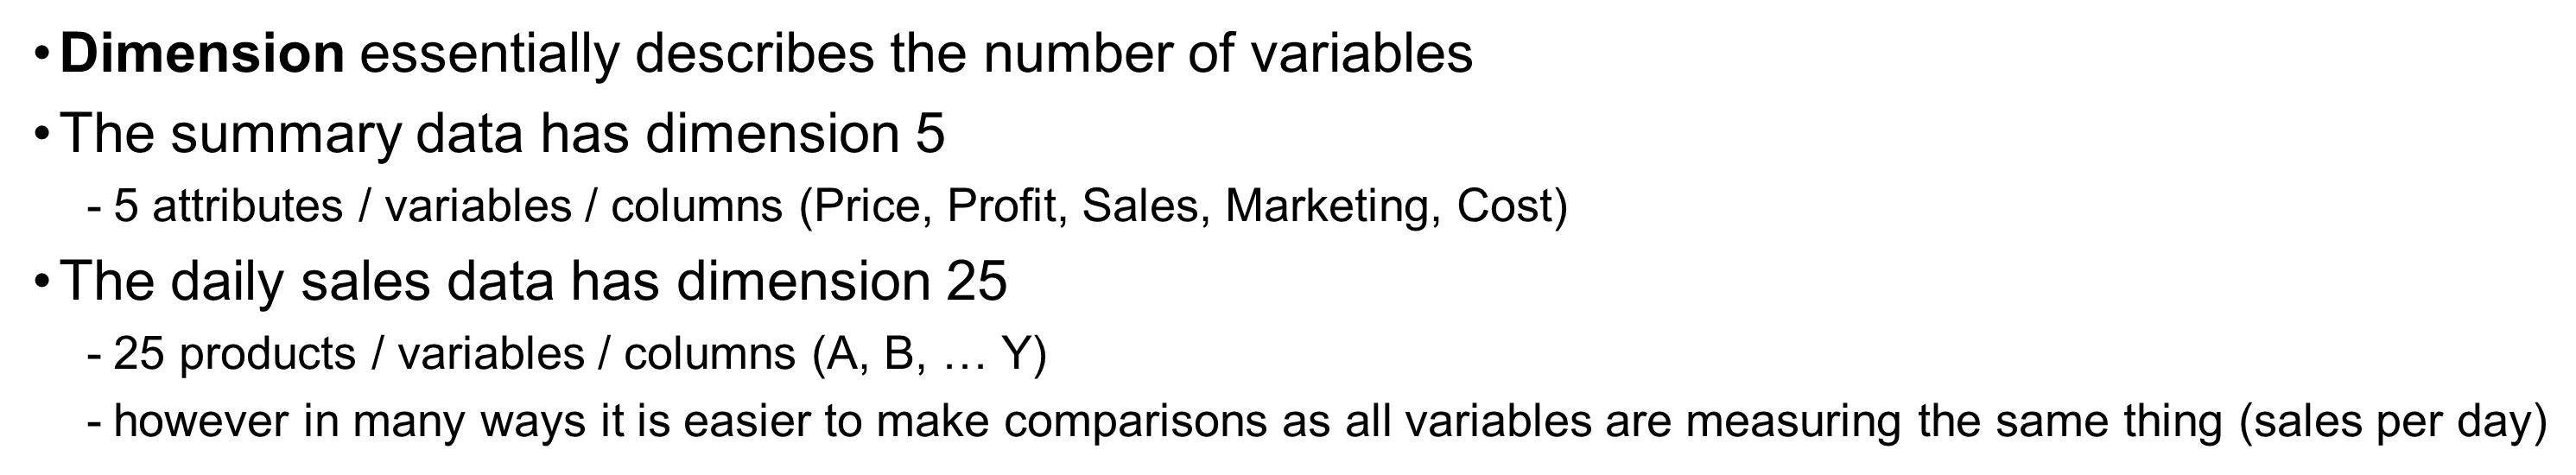

#### **01BarChart all attributes**

- First let’s draw a bar chart of each attribute (Price, Profit, …)

In [ ]:
for attribute in summary_data:
    plt.figure(figsize=(8,8))
    x_pos = np.arange(len(summary_data.index))
    plt.bar(x_pos, summary_data[attribute], align="center") # the bar plot
    plt.xticks(x_pos, summary_data.index)
    plt.xlabel("Products", fontsize=18)
    plt.ylabel(attribute, fontsize=18)
    plt.show()
    

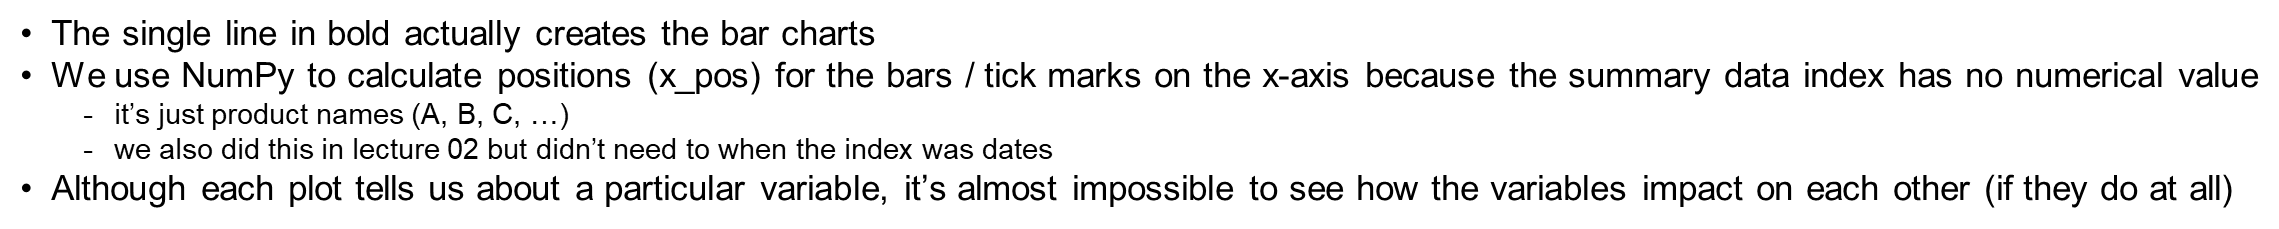

<a href="C:\\Users\\abume\\OneDrive - University of Greenwich\\Term2\\Data_Visualisation\\L02 Proportion">Lecture 02</a>

#### **02BarChart all attributes subplots**

- Even using faceting / subplots doesn’t help illuminate the data

In [ ]:
plt.figure(figsize=(8,8))
index = 1
x_pos = np.arange(len(summary_data.index))
for attribute in summary_data:
    sub = plt.subplot(3,2,index)
    sub.bar(x_pos, summary_data[attribute], align="center")
    sub.set_xticks([])
    sub.set_xlabel("Products", fontsize=12)
    sub.set_ylabel(attribute, fontsize=12)
    index += 1
plt.tight_layout()
plt.show()

- The variables all have different scales (e.g. £ per unit, units sold, total spend in £) and there are no obvious relationships
    - the challenge is to compare these effectively via visualisation


## **Normalisation**

- The first thing to do is to `normalise` the data so that everything has the same scale
    - makes it much easier to compare
- **Normalisation** has a number of different meanings in different contexts but here it means “scale all the values to lie between 0 and 1”
- This is easy to achieve – just divide each variable by its maximum value


In [ ]:
normalized_data = summary_data / summary_data.max()
# normalized_data.head()

- We could do this in place (so that `summary_data` was normalised) but here we create a new dataframe, normalised_data

#### **03ComparativeBarChart high volume**

- One way to compare attributes is using a comparative bar chart which merges the 5 bar charts into one, giving each attribute a different colour
    - however with 5 attributes and 25 product that is going to result in 125 bars, which is far too many!
    - instead we segment and, for example, look at the high volume products, A, F & L


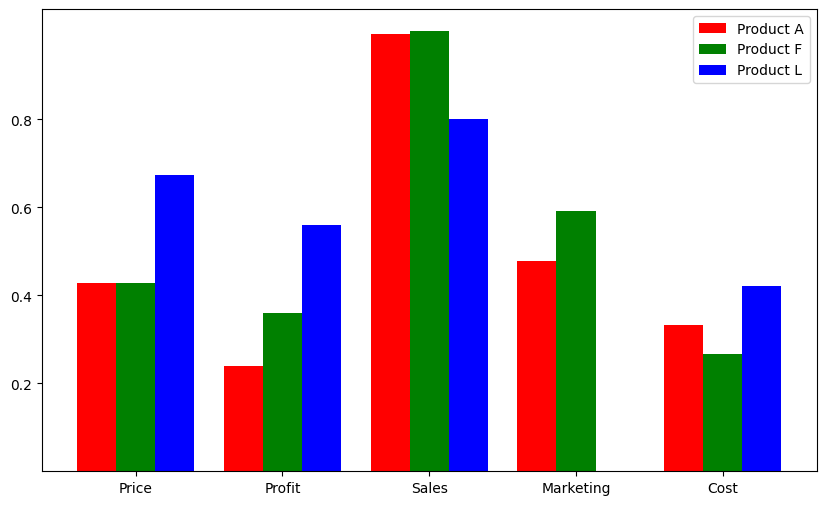

In [10]:
high_volume = ["A", "F", "L"] # high volume
colours = ["r", "g", "b", "c", "m", "y", "k"]
plt.figure(figsize=(10,6))
c = 0
n_bars = len(high_volume)
x_pos_base = np.arange(len(summary_data.columns))
bar_width = 0.8 / n_bars
for product in high_volume:
    values = normalized_data.loc[product].values.flatten().tolist()
    x_pos = [x + (bar_width*c) for x in x_pos_base]
    plt.bar(x_pos, values, color=colours[c % len(colours)], width=bar_width, label="Product " + product)
    c += 1
plt.yticks([y/10 for y in range(2,10,2)])
x_pos = [x + (bar_width * (c-1)/2) for x in x_pos_base]
plt.xticks(x_pos, summary_data.columns)
plt.legend()
plt.show()

- The code is a bit involved –  we won’t consider in detail, since we will not use it again

### **Radar / Spider plots**

- Another way to do to compare these 5 variables is via a radar plot
    - set the normalised variables out around a circle
    - plot the values (with the centre of the circle as 0 and the circumference as 1)
    - join the dots to create a shape
- The variables’ order can be important; here:
    - positive measures that the company might want to maximise (profit & sales) are at the top
    -negative measures that the company might want to minimise (marketing & cost) are at the bottom
    - price is in the middle as it is neither
    - per unit values (profit, price & cost) are on the right
    - total measures (sales & marketing) are on the left
- Arranging the variables like this means that we can easily identify more desirable shapes
    - i.e. those where most of the volume is at the top
- Compare radar plots by `faceting` or `overlaying`

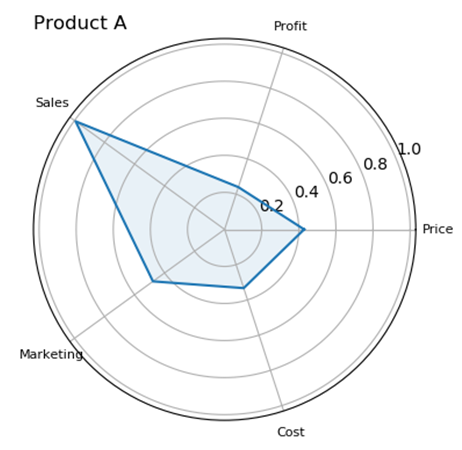



- The following code creates radar subplots for all products

In [ ]:
n_attributes = len(summary_data.columns)
labels = list(summary_data.columns) # dataLocator locations must start and finish with same point.
labels.append("Price")
angles = [n/float(n_attributes)*2*np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8,8))
index = 1
for name in normalized_data.index:
    values = normalized_data.loc[name].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(5,5, index, polar=True)
    sub.plot(angles, values)
    sub.set_yticks([])
    sub.set(xticks=angles, xticklabels=labels)
    sub.set_xticks(angles) 
    sub.set_title(name, fontsize=8, loc="left")
    index += 1
plt.tight_layout()
plt.show()


- calculate a list of angles (with 5 variables each angles is 360 / 5 = 72)
- calculate a list of values (with the first value added onto the end of the list so the line around the shape is joined up)
- do a polar plot (i.e. circular) of values against angles

#### **05RadarPlot high volume subplots.py**

Restricting the previous code to high volume product just involves a few small changes

In [12]:
summary_data.columns

Index(['Price', 'Profit', 'Sales', 'Marketing', 'Cost'], dtype='object')

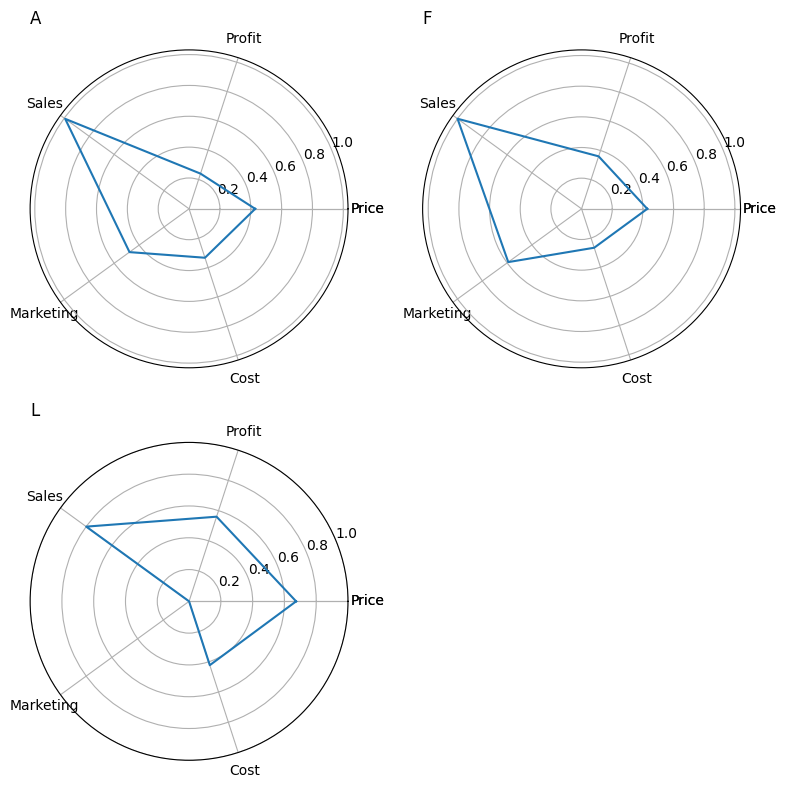

In [11]:
n_attributes = len(summary_data.columns)
labels = list(summary_data.columns) # dataLocator locations must start and finish with same point.
labels.append("Price")
angles = [n/float(n_attributes)*2*np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8,8))
index = 1
for name in high_volume:
    values = normalized_data.loc[name].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(2,2, index, polar=True)
    sub.plot(angles, values)
    sub.set_yticks([.2,.4,.6,.8,1.0])
    sub.set(xticks=angles, xticklabels=labels)
    sub.set_xticks(angles) 
    sub.set_title(name, fontsize=12, loc="left")
    index += 1
plt.tight_layout()
plt.show()


- in this example the shapes are filled in (alpha refers to transparency)
- we can also add y-ticks because there’s more space

#### **06RadarPlot high volume overlaid.py**

- Another common way of comparing radar plots is to overlay them

In [ ]:
n_attributes = len(summary_data.columns)
angles = [n / float(n_attributes)*2*np.pi for n in range(n_attributes+1)]
colours = ["b", "g", "r"]
c = 0
plt.figure(figsize=(8,8))
sub = plt.subplot(1,1,1, polar=True)

for name in high_volume:
    values = normalized_data.loc[name].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label="product " + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=.2)
    sub.set_yticks([n/10 for n in range(2,10,2)])
    sub.set(xticks=angles, xticklabels=labels)
    c += 1
plt.legend(loc="best")
plt.show()
# plt.style.use("dark_background")

- most of the changes just involve colours 
- the other change is that we only create one plot rather than a new one each time around the loop (strictly speaking don’t need subplots at all – just left in to make comparison easier)

### **Correlogram / Pair Plot**

- We already know that the only closely correlated attributes are Price and Cost
    - in Lecture 04, example 12, we calculated a heat map of the correlations
- But helpful to visualise the correlations
    - particularly to inform the bubble plots in the rest of the lecture
- Previously we just calculated a load of correlations between time-series but didn’t arrange them logically
 -But we could arrange them to match the columns & rows in the heat map
- For the diagonal just put a histogram of the variable’s distribution
    - no point in showing a correlation of a variable with itself)
- This type of visualisation is known as a `correlogram` or `pair plot`

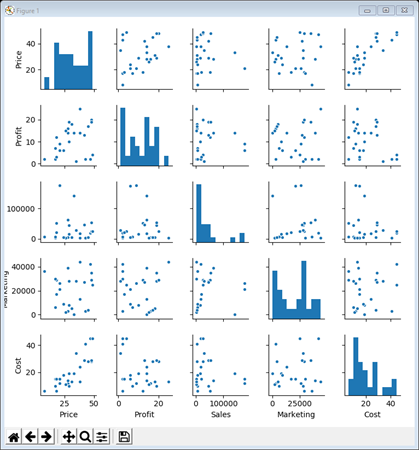


#### **07Correlogram all attributes.py**

- It’s not too difficult to create a correlogram using MatPlotLib subplots … but it’s even easier using Seaborn


- Seaborn does the whole thing for us, with a couple of adjustments
    - height=1.5 controls the height of each plot and thus the overall size of the figure
    - plot_kws={'s': 20} controls the size of the dots

In [ ]:
sns.pairplot(summary_data, height=1.5, plot_kws={"s": 20})

## **Bubble plots**

- Although we know there is little correlation in this dataset, individual values for one variable can still impact on other variables
    - want to visualise this if at all possible but can’t really visualise 5 dimensions
- However a common way of visualising 3 dimensions is by using a bubble plot (like an enhanced scatter plot)
    - choose 2 of the 3 variables to plot along the x and y axes (standard scatter plot)
    - make the sizes of the dots proportional to the values of the 3rd variable – these are the bubbles
- So a bubble plot of variables U vs V vs W will have the bubbles in the same position as a scatter plot of U vs V but with bubble size governed by W


### **08BubblePlot price cost profit.py**

- First we plot price vs cost vs profit (i.e. the scatter plot we have already seen with bubble size determined by profit)
    - bubble size is set here – the scaling value 20 is set by trial and error
    - the plot is created with scatter() but also setting bubble size and transparency
    - the bubbles are all labelled (see outlier examples last week)
    - we add a line showing where price = cost (i.e. zero profit)

In [ ]:
summary_data["BubbleSize"] = summary_data["Profit"] * 20 # set size of bubble by trial and error

plt.figure(figsize=(8,8))
plt.scatter(summary_data["Price"], summary_data["Cost"], s=summary_data["BubbleSize"], alpha=.5)
plt.xticks([10, 20, 30, 40, 50])
plt.yticks([10, 20, 30, 40, 50])
plt.title("Price vs Cost (vs Profit)", fontsize=20)
plt.xlabel("Price", fontsize=18)
plt.ylabel("Cost", fontsize=18)

for i, name in enumerate(summary_data.index):
    plt.annotate(name, (summary_data["Price"][i], summary_data["Cost"][i]))
plt.plot([0, 50], [0, 50], linestyle=":", linewidth=4, color="r", label="price = cost (zero profit)")
plt.legend(loc="best")
plt.show()

**Observations**

- Everything is to the right of the line
    - if a product was to the left that would indicate cost is greater than the price (i.e. negative profit – not impossible, e.g. for loss leaders, but unlikely)
- Do you notice something about the bubble sizes?
    - they get bigger the further away from the line they are … what does this mean?
- In fact this is inevitable – for any fixed cost, moving to the right is equivalent to increasing the price
    - because profit = price – cost … so inevitably, for a fixed cost, the profit must increase as the price increases
- This is actually a result of the fact that profit, price & cost are co-dependent
    - if you know any two of them, you can calculate the third


#### **09BubblePlot price cost sales.py**

- Let’s try plotting price vs cost vs sales (same positions as before, but different bubble sizes)
	- bubble scaling is very different (0.01 as compared with 20) but other than that the code is virtually identical.

In [ ]:
summary_data["BubbleSize"] = summary_data["Sales"] * .01 # set size of bubble by trial and error

plt.figure(figsize=(8,8))
plt.scatter(summary_data["Price"], summary_data["Cost"], s=summary_data["BubbleSize"], alpha=.5)
plt.xticks([10, 20, 30, 40, 50])
plt.yticks([10, 20, 30, 40, 50])
plt.title("Price vs Cost (vs Profit)", fontsize=20)
plt.xlabel("Price", fontsize=18)
plt.ylabel("Cost", fontsize=18)

for i, name in enumerate(summary_data.index):
    plt.annotate(name, (summary_data["Price"][i], summary_data["Cost"][i]))
plt.plot([0, 50], [0, 50], linestyle=":", linewidth=4, color="r", label="price = cost (zero profit)")
plt.legend(loc="best")
plt.show()

- No observable pattern to the bubble sizes
- However, remember that the further away (horizontally) that a bubble is from the line, the higher the profit per unit
- So although `U` has a tiny bubble size (`low sales`), it’s one of the most profitable items


#### **10BubblePlot marketing sales profit.py**

- Returning to the scatter plot from the end of last week’s lecture (marketing vs sales) let’s put bubble sizes showing the profit
	- the code is essentially the same with adjustments to the variables chosen, the bubble scaling and the labelling

	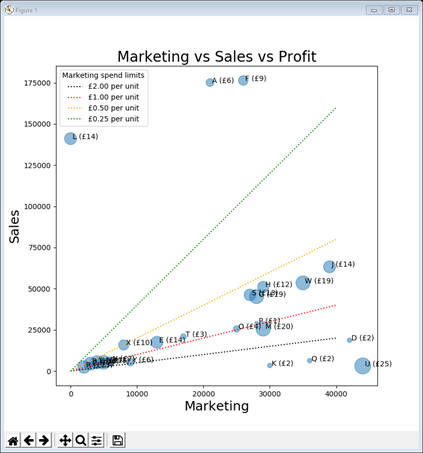

In [ ]:
summary_data["BubbleSize"] = summary_data["Profit"] * 20 # set size of bubble by trial and error

plt.figure(figsize=(8,8))
plt.scatter(summary_data["Marketing"], summary_data["Sales"], s=summary_data["BubbleSize"], alpha=.5)
plt.title('Marketing vs Sales vs Profit', fontsize=20)
plt.xlabel("Marketing", fontsize=18)
plt.ylabel("Sales", fontsize=18)
# ===
for i, name in enumerate(summary_data.index):
    plt.annotate(name + " (£" + str(int(summary_data["Profit"][i])) + ")",
                (summary_data["Marketing"][i]+300, summary_data["Sales"][i]))

summary_data = summary_data.drop(["BubbleSize"], axis=1)

plt.plot([0, 50000], [0, 25000], linestyle=':', color='black', label='£2.00 per unit')
plt.plot([0, 50000], [0, 50000], linestyle=':', color='red', label='£1.00 per unit')
plt.plot([0, 50000], [0, 75000], linestyle=':', color='orange', label='£0.50 per unit')
plt.plot([0, 50000], [0, 100000], linestyle=':', color='green', label='£0.25 per unit')
plt.plot([0,50000], [0,200000], c="r", linestyle=":")
plt.legend(loc="best", title='Marketing spend limits')

plt.show()

**Observations**

- Previously we identified that D, K, Q & U had more than £2 per unit sold spend on marketing
- However, now we can see that since U sells for such a huge profit (£25 per unit!!) it’s probably OK to spend more on marketing it
- It does bring up the question – for each unit sold, how much is spent on marketing?


#### **Advertising**

- Let’s add another column to the summary dataframe called Advertising 
    - calculated as the marketing spend divided by the total sales for a product
- Essentially Advertising is the marketing per unit
    - although if the number of sales change in the future, this value will also change, even if the marketing spend stays the same


In [ ]:
summary_data["Advertising"] = summary_data["Marketing"] / summary_data["Sales"]
summary_data.head()

In [ ]:
summary_data['BubbleSize'] = summary_data['Sales'] * 0.01

plt.figure(figsize=(8, 8))
plt.scatter(summary_data['Profit'], summary_data['Advertising'],
        s=summary_data['BubbleSize'], alpha=0.5)
plt.title('Profit vs Advertising (vs Sales)', fontsize=20)
plt.xlabel('Profit per unit (£)', fontsize=18)
plt.ylabel('Advertising per unit (£)', fontsize=18)
for i, name in enumerate(summary_data.index):
    plt.annotate(name, (summary_data['Profit'][i] + 0.1,
        summary_data['Advertising'][i]))
plt.plot([0, 25], [2, 2], linestyle=':', color='black', label='£2.00 per unit')
plt.plot([0, 25], [1, 1], linestyle=':', color='red', label='£1.00 per unit')
plt.plot([0, 25], [0.5, 0.5], linestyle=':', color='orange', label='£0.50 per unit')
plt.plot([0, 25], [0.25, 0.25], linestyle=':', color='green', label='£0.25 per unit')
plt.plot([0, 15], [0, 15], color='magenta', label='profit = advertising (break even)')
plt.legend(loc=2, title='Marketing spend limits')
plt.show()


**Observations**

- For anything above the break even line (D, K, Q and possibly P), more money is being spent on advertising than is being made in profit
    - these products are making a loss overall!
- However, although U has the highest advertising spend it is comfortably making a profit overall


In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(summary_data['Profit'], summary_data['Advertising'],
        s=summary_data['BubbleSize'], alpha=0.5)
plt.yscale('log') # logarithmic scale
plt.title('Profit vs Advertising (vs Sales)', fontsize=20)
plt.xlabel('Profit per unit (£)', fontsize=18)
plt.ylabel('Advertising per unit (£)', fontsize=18)
for i, name in enumerate(summary_data.index):
    plt.annotate(name, (summary_data['Profit'][i] + 0.1, summary_data['Advertising'][i]))

... # advertising spend limit lines drawn here
plt.plot([0, 25], [2, 2], linestyle=':', color='black', label='£2.00 per unit')
plt.plot([0, 25], [1, 1], linestyle=':', color='red', label='£1.00 per unit')
plt.plot([0, 25], [0.5, 0.5], linestyle=':', color='orange', label='£0.50 per unit')
plt.plot([0, 25], [0.25, 0.25], linestyle=':', color='green', label='£0.25 per unit')

plt.legend(loc=2, title='Marketing spend limits')
break_even = [x for x in range(25)]
plt.plot(break_even, break_even, linestyle='-', color='magenta', label='profit = marketing (break even)')
plt.legend(loc=2, title='Advertising spend limits')
plt.show()


- On the previous plot most of the bubbles are clustered at the bottom
    - can space them better by using a logarithmic scale on the y-axis

- the code is almost exactly the same
- the log scale is set here
    - the profit / advertising break even has to be adjusted (the previous version just joined up the two end points, but that doesn’t work here since the line is now curved in log space)
- the high volume products have dropped off the bottom – negative log values

## Data conclusions

- Reminder - we are not making business recommendations
    - let the business analyst decide what to do
- However …
    - can compare more than two variables in a variety of ways
    - some products (D, K & Q) are making a loss when marketing is taken into account
    - some products could have higher marketing spend (e.g. L & U)


## Lecture summary

- Looked at visualising datasets with higher dimensions
    - comparative bar charts
    - radar plots
    - correlograms
    - bubble plots
- More techniques for the toolbox
    - but not always obvious which to use or which variables to compare
    - need to apply some reasoning
    - can be more of an art than a science
